In [1]:
import sys
import os
sys.path.insert(0, "../../python")

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
plt.style.use('notes')
import beam.calc.electron as ecalc
from lens import profile
from scipy.optimize import minimize
import scipy.constants as const
me = const.physical_constants['electron mass energy equivalent in MeV'][0]

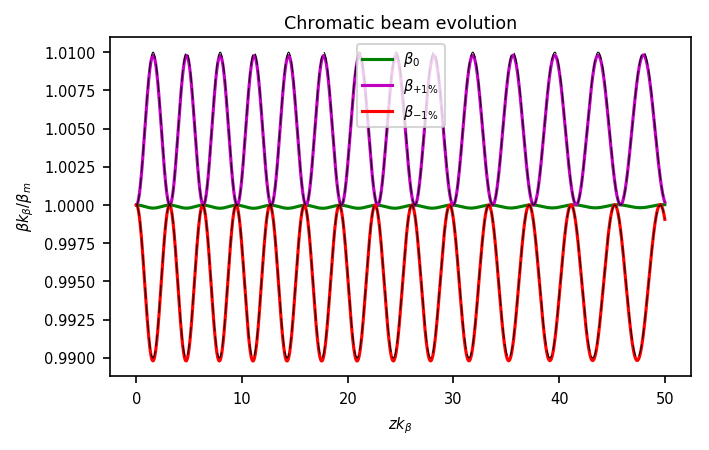

In [2]:
# Check to make sure the matched solution for beta of off energy particles works
N = 5000
beta0 = 1
alpha0 = 0
gb0 = 20000
ne0 = 2*gb0/5.95074e4**2
dgdz0 = 0.0
a = 0.02
z = np.linspace(0, 50, N)
frac = 1/(1+(a*z)**2)
ne = frac*ne0
beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)
beta1, alpha1, gamma1, gb1 = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0*1.01, dgdz0, ne0)
betan1, alphan1, gamman1, gbn1 = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0*0.99, dgdz0, ne0)

betam = 1/np.sqrt(frac)
dz = z[1]-z[0]
theta = (np.cumsum(1/betam)-1/betam[0])*dz
beta1a = 1 + 0.01/2*(1-np.cos(2*(1-0.01/2)*theta))
beta2a = 1 - 0.01/2*(1-np.cos(2*(1+0.01/2)*theta))

plt.figure(figsize=(5, 3), dpi=150)
plt.plot(z, beta/betam, 'g')
plt.plot(z, beta1/betam, 'm')
plt.plot(z, betan1/betam, 'r')
plt.plot(z, beta1a, 'k--', linewidth=0.5)
plt.plot(z, beta2a, 'k--', linewidth=0.5)
#plt.plot(z, 1+0*betam, 'b')
plt.title(r'Chromatic beam evolution')
plt.xlabel(r'$z k_\beta$')
plt.ylabel(r'$\beta k_\beta/\beta_m$')
plt.legend([r'$\beta_{0}$', r'$\beta_{+1\%}$', r'$\beta_{-1\%}$'], loc=9)
plt.show()

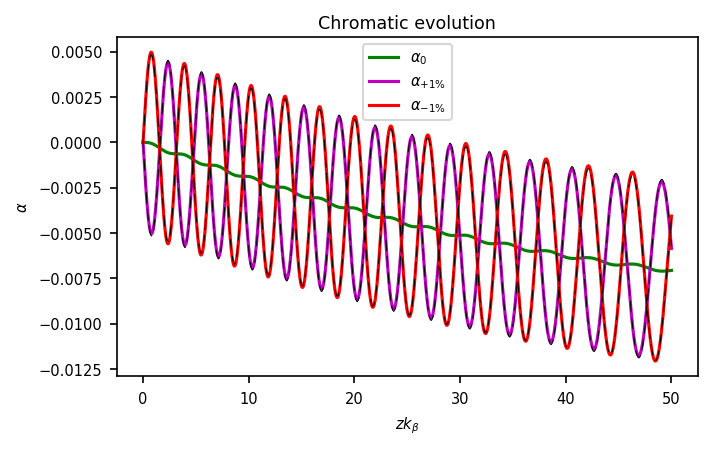

In [3]:
# Check if the approximate expression for alpha works
gamma0 = (1+alpha0**2)/beta0
am0 = 0
A = alpha0 - am0*beta0
Bp = (beta0+gamma0-alpha0*am0)/2
Bm = (beta0-gamma0+alpha0*am0)/2
C = gamma0-alpha0*am0

betam = 1/np.sqrt(frac)
dz = z[1]-z[0]
bm = 1/np.sqrt(frac)
theta = (np.cumsum(1/betam)-1/betam[0])*dz
am = -np.gradient(betam, dz)/2
delta = 0.01
psi = (1-delta/2)*theta
alpha1a = am*beta1a + (-delta/2*(C+Bm)*np.sin(2*psi)+A*np.cos(2*psi)+Bm*np.sin(2*psi))
delta = -0.01
psi = (1-delta/2)*theta
alpha2a = am*beta1a + (-delta/2*(C+Bm)*np.sin(2*psi)+A*np.cos(2*psi)+Bm*np.sin(2*psi))


plt.figure(figsize=(5, 3), dpi=150)
plt.plot(z, alpha, 'g')
plt.plot(z, alpha1, 'm')
plt.plot(z, alphan1, 'r')
plt.plot(z, alpha1a, 'k--', linewidth=0.5)
plt.plot(z, alpha2a, 'k--', linewidth=0.5)
#plt.plot(z, 1+0*betam, 'b')
plt.title(r'Chromatic evolution')
plt.xlabel(r'$z k_\beta$')
plt.ylabel(r'$\alpha$')
plt.legend([r'$\alpha_{0}$', r'$\alpha_{+1\%}$', r'$\alpha_{-1\%}$'], loc=9)
plt.show()

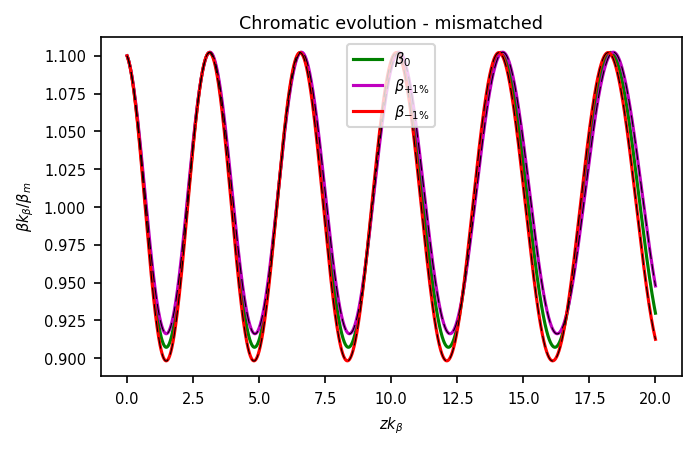

In [4]:
# Lets check the general solution for beta
N = 5000
beta0 = 1.1
alpha0 = 0.01
gb0 = 20000
ne0 = 2*gb0/5.95074e4**2
dgdz0 = 0.0
a = 0.02
z = np.linspace(0, 20, N)
frac = 1/(1+a*z)**2
ne = frac*ne0
beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)
beta1, alpha1, gamma1, gb1 = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0*1.01, dgdz0, ne0)
betan1, alphan1, gamman1, gbn1 = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0*0.99, dgdz0, ne0)

gamma0 = (1+alpha0**2)/beta0
am0 = -a/2
A = alpha0 - am0*beta0
Bp = (beta0+gamma0-2*alpha0*am0)/2
Bm = (beta0-gamma0+2*alpha0*am0)/2
C = gamma0-alpha0*am0

betam = 1/np.sqrt(frac)
dz = z[1]-z[0]
bm = 1/np.sqrt(frac)
theta = (np.cumsum(1/betam)-1/betam[0])*dz
delta = 0.01
psi = (1-delta/2)*theta
beta1a = delta/2*(C*(1-np.cos(2*psi))-A*np.sin(2*psi))+(Bm*np.cos(2*psi)-A*np.sin(2*psi)+Bp)
delta = -0.01
psi = (1-delta/2)*theta
beta2a = delta/2*(C*(1-np.cos(2*psi))-A*np.sin(2*psi))+(Bm*np.cos(2*psi)-A*np.sin(2*psi)+Bp)

plt.figure(figsize=(5, 3), dpi=150)
plt.plot(z, beta/betam, 'g')
plt.plot(z, beta1/betam, 'm')
plt.plot(z, betan1/betam, 'r')
plt.plot(z, beta1a, 'k--', linewidth=0.5)
plt.plot(z, beta2a, 'k--', linewidth=0.5)
#plt.plot(z, 1+0*betam, 'b')
plt.title(r'Chromatic evolution - mismatched')
plt.xlabel(r'$z k_\beta$')
plt.ylabel(r'$\beta k_\beta/\beta_m$')
plt.legend([r'$\beta_{0}$', r'$\beta_{+1\%}$', r'$\beta_{-1\%}$'], loc=9)
plt.show()

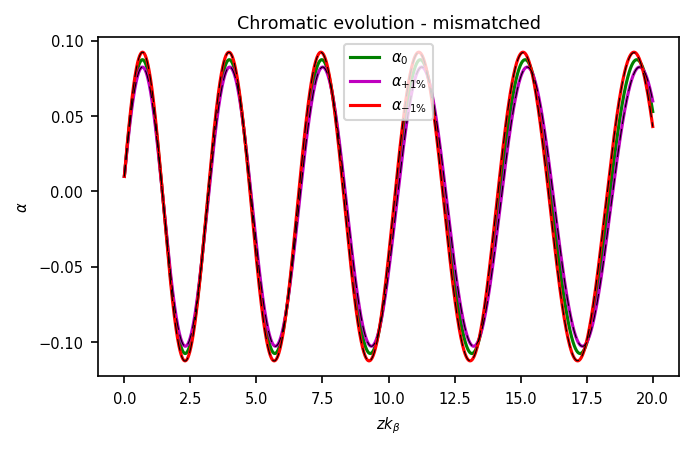

In [5]:
# Lets check the approximations for the other CS parameters
am = -np.gradient(bm, dz)/2
delta = 0.01
psi = (1-delta/2)*theta
alpha1a = am*beta1a + (-delta/2*(C+Bm)*np.sin(2*psi)+A*np.cos(2*psi)+Bm*np.sin(2*psi))
delta = -0.01
psi = (1-delta/2)*theta
alpha2a = am*beta1a + (-delta/2*(C+Bm)*np.sin(2*psi)+A*np.cos(2*psi)+Bm*np.sin(2*psi))


plt.figure(figsize=(5, 3), dpi=150)
plt.plot(z, alpha, 'g')
plt.plot(z, alpha1, 'm')
plt.plot(z, alphan1, 'r')
plt.plot(z, alpha1a, 'k--', linewidth=0.5)
plt.plot(z, alpha2a, 'k--', linewidth=0.5)
#plt.plot(z, 1+0*betam, 'b')
plt.title(r'Chromatic evolution - mismatched')
plt.xlabel(r'$z k_\beta$')
plt.ylabel(r'$\alpha$')
plt.legend([r'$\alpha_{0}$', r'$\alpha_{+1\%}$', r'$\alpha_{-1\%}$'], loc=9)
plt.show()

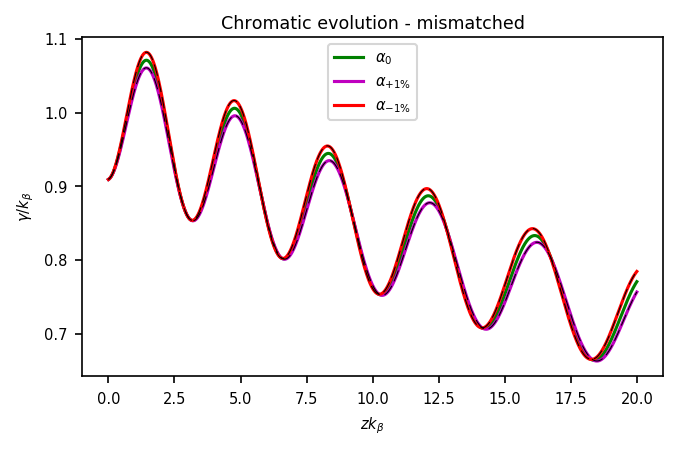

In [6]:
# Now the big one, approximations to gamma
# Lets check the approximations for the other CS parameters
delta = 0.01
psi = (1-delta/2)*theta
Pa = (-delta/2*(C+Bm)*np.sin(2*psi)+A*np.cos(2*psi)+Bm*np.sin(2*psi))
gamma1a = (1+Pa**2)/beta1a/bm + 2*am*alpha1a/bm
delta = -0.01
psi = (1-delta/2)*theta
Pa = (-delta/2*(C+Bm)*np.sin(2*psi)+A*np.cos(2*psi)+Bm*np.sin(2*psi))
gamma2a = (1+Pa**2)/beta2a/bm + 2*am*alpha2a/bm

plt.figure(figsize=(5, 3), dpi=150)
plt.plot(z, gamma, 'g')
plt.plot(z, gamma1, 'm')
plt.plot(z, gamman1, 'r')
plt.plot(z, gamma1a, 'k--', linewidth=0.5)
plt.plot(z, gamma2a, 'k--', linewidth=0.5)
#plt.plot(z, 1+0*betam, 'b')
plt.title(r'Chromatic evolution - mismatched')
plt.xlabel(r'$z k_\beta$')
plt.ylabel(r'$\gamma/k_\beta$')
plt.legend([r'$\alpha_{0}$', r'$\alpha_{+1\%}$', r'$\alpha_{-1\%}$'], loc=9)
plt.show()

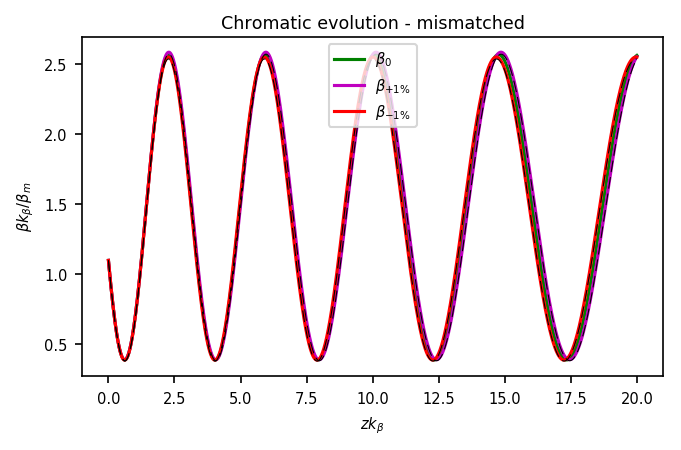

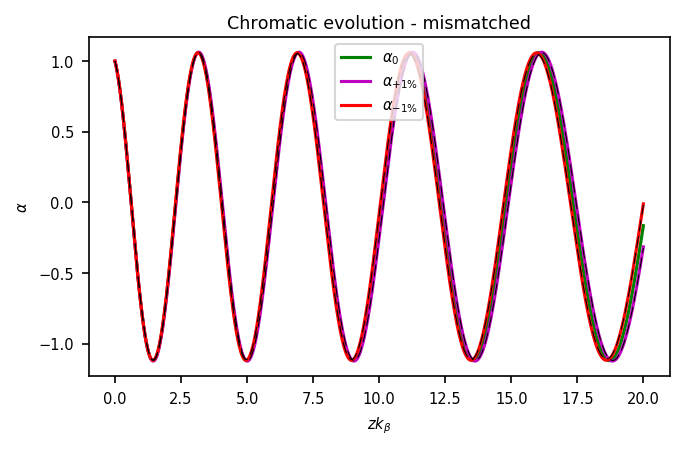

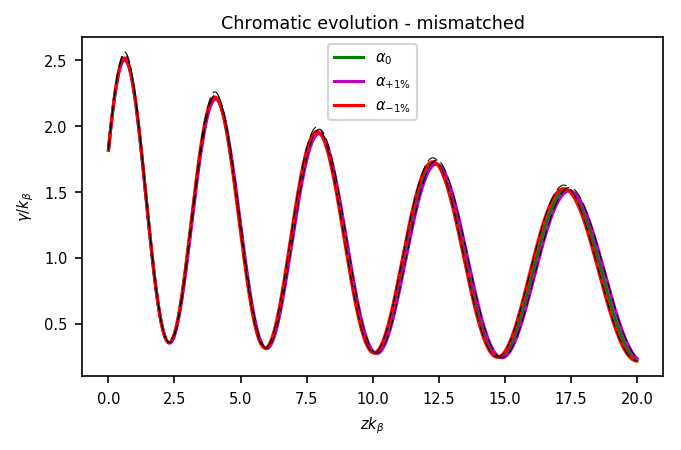

In [7]:
# Check approximations with large alpha
N = 5000
beta0 = 1.1
alpha0 = 1
gb0 = 20000
ne0 = 2*gb0/5.95074e4**2
dgdz0 = 0.0
a = 0.04
z = np.linspace(0, 20, N)
frac = 1/(1+a*z)**2
ne = frac*ne0
beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)
beta1, alpha1, gamma1, gb1 = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0*1.01, dgdz0, ne0)
betan1, alphan1, gamman1, gbn1 = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0*0.99, dgdz0, ne0)

gamma0 = (1+alpha0**2)/beta0
am0 = -a/2
A = alpha0 - am0*beta0
Bp = (beta0+gamma0-alpha0*am0)/2
Bm = (beta0-gamma0+alpha0*am0)/2
C = gamma0-alpha0*am0

betam = 1/np.sqrt(frac)
dz = z[1]-z[0]
bm = 1/np.sqrt(frac)
theta = (np.cumsum(1/betam)-1/betam[0])*dz
delta = 0.01
psi = (1-delta/2)*theta
beta1a = delta/2*(C*(1-np.cos(2*psi))-A*np.sin(2*psi))+(Bm*np.cos(2*psi)-A*np.sin(2*psi)+Bp)
delta = -0.01
psi = (1-delta/2)*theta
beta2a = delta/2*(C*(1-np.cos(2*psi))-A*np.sin(2*psi))+(Bm*np.cos(2*psi)-A*np.sin(2*psi)+Bp)

plt.figure(figsize=(5, 3), dpi=150)
plt.plot(z, beta/betam, 'g')
plt.plot(z, beta1/betam, 'm')
plt.plot(z, betan1/betam, 'r')
plt.plot(z, beta1a, 'k--', linewidth=0.5)
plt.plot(z, beta2a, 'k--', linewidth=0.5)
#plt.plot(z, 1+0*betam, 'b')
plt.title(r'Chromatic evolution - mismatched')
plt.xlabel(r'$z k_\beta$')
plt.ylabel(r'$\beta k_\beta/\beta_m$')
plt.legend([r'$\beta_{0}$', r'$\beta_{+1\%}$', r'$\beta_{-1\%}$'], loc=9)
plt.show()

# Lets check the approximations for the other CS parameters
am = -np.gradient(bm, dz)/2
delta = 0.01
psi = (1-delta/2)*theta
alpha1a = am*beta1a + (-delta/2*(C+Bm)*np.sin(2*psi)+A*np.cos(2*psi)+Bm*np.sin(2*psi))
delta = -0.01
psi = (1-delta/2)*theta
alpha2a = am*beta1a + (-delta/2*(C+Bm)*np.sin(2*psi)+A*np.cos(2*psi)+Bm*np.sin(2*psi))


plt.figure(figsize=(5, 3), dpi=150)
plt.plot(z, alpha, 'g')
plt.plot(z, alpha1, 'm')
plt.plot(z, alphan1, 'r')
plt.plot(z, alpha1a, 'k--', linewidth=0.5)
plt.plot(z, alpha2a, 'k--', linewidth=0.5)
#plt.plot(z, 1+0*betam, 'b')
plt.title(r'Chromatic evolution - mismatched')
plt.xlabel(r'$z k_\beta$')
plt.ylabel(r'$\alpha$')
plt.legend([r'$\alpha_{0}$', r'$\alpha_{+1\%}$', r'$\alpha_{-1\%}$'], loc=9)
plt.show()

# Now the big one, approximations to gamma
# Lets check the approximations for the other CS parameters
delta = 0.01
psi = (1-delta/2)*theta
Pa = (-delta/2*(C+Bm)*np.sin(2*psi)+A*np.cos(2*psi)+Bm*np.sin(2*psi))
gamma1a = (1+Pa**2)/beta1a/bm + 2*am*alpha1a/bm
delta = -0.01
psi = (1-delta/2)*theta
Pa = (-delta/2*(C+Bm)*np.sin(2*psi)+A*np.cos(2*psi)+Bm*np.sin(2*psi))
gamma2a = (1+Pa**2)/beta2a/bm + 2*am*alpha2a/bm

plt.figure(figsize=(5, 3), dpi=150)
plt.plot(z, gamma, 'g')
plt.plot(z, gamma1, 'm')
plt.plot(z, gamman1, 'r')
plt.plot(z, gamma1a, 'k--', linewidth=0.5)
plt.plot(z, gamma2a, 'k--', linewidth=0.5)
#plt.plot(z, 1+0*betam, 'b')
plt.title(r'Chromatic evolution - mismatched')
plt.xlabel(r'$z k_\beta$')
plt.ylabel(r'$\gamma/k_\beta$')
plt.legend([r'$\alpha_{0}$', r'$\alpha_{+1\%}$', r'$\alpha_{-1\%}$'], loc=9)
plt.show()

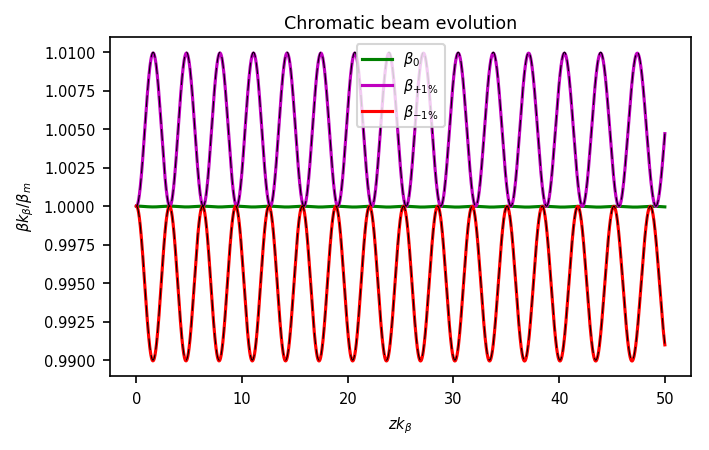

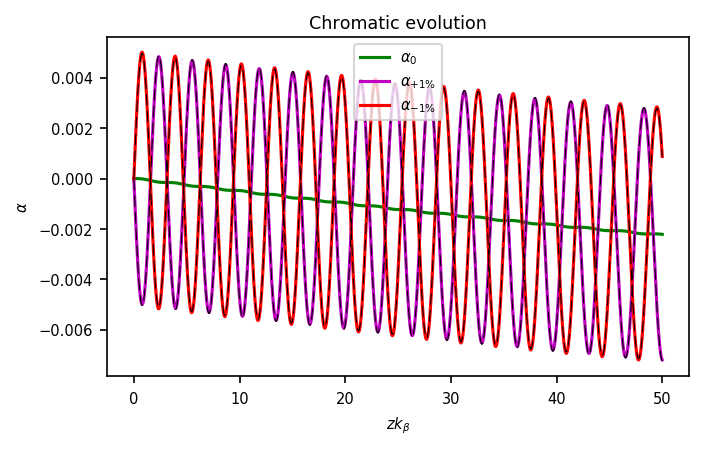

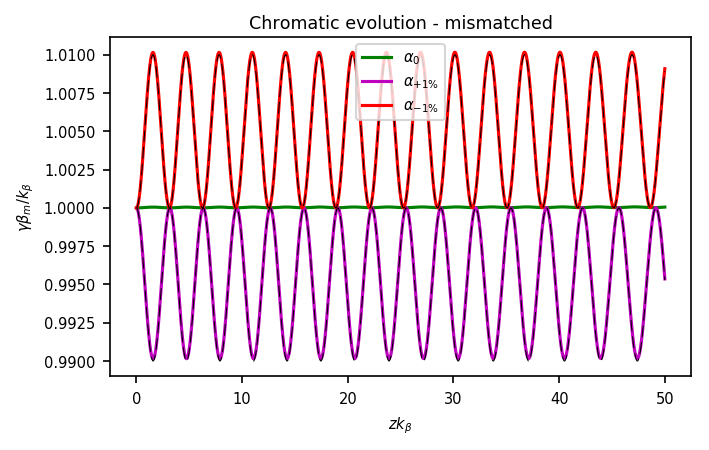

In [8]:
# The matched case in detail
# Check to make sure the matched solution for beta of off energy particles works
N = 5000
beta0 = 1
alpha0 = 0
gb0 = 20000
ne0 = 2*gb0/5.95074e4**2
dgdz0 = 0.0
a = 0.01
z = np.linspace(0, 50, N)
frac = 1/(1+(a*z)**2)
ne = frac*ne0
beta, alpha, gamma, gb = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0, dgdz0, ne0)
beta1, alpha1, gamma1, gb1 = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0*1.01, dgdz0, ne0)
betan1, alphan1, gamman1, gbn1 = ecalc.cs_propagation(z, ne, beta0, alpha0, gb0*0.99, dgdz0, ne0)

betam = 1/np.sqrt(frac)
dz = z[1]-z[0]
theta = (np.cumsum(1/betam)-1/betam[0])*dz
beta1a = 1 + 0.01/2*(1-np.cos(2*(1-0.01/2)*theta))
beta2a = 1 - 0.01/2*(1-np.cos(2*(1+0.01/2)*theta))

plt.figure(figsize=(5, 3), dpi=150)
plt.plot(z, beta/betam, 'g')
plt.plot(z, beta1/betam, 'm')
plt.plot(z, betan1/betam, 'r')
plt.plot(z, beta1a, 'k--', linewidth=0.5)
plt.plot(z, beta2a, 'k--', linewidth=0.5)
#plt.plot(z, 1+0*betam, 'b')
plt.title(r'Chromatic beam evolution')
plt.xlabel(r'$z k_\beta$')
plt.ylabel(r'$\beta k_\beta/\beta_m$')
plt.legend([r'$\beta_{0}$', r'$\beta_{+1\%}$', r'$\beta_{-1\%}$'], loc=9)
plt.show()

# Check if the approximate expression for alpha works
gamma0 = (1+alpha0**2)/beta0

bm = 1/np.sqrt(frac)
am = -np.gradient(betam, dz)/2
delta = 0.01
psi = (1-delta/2)*theta
alpha1a = am*beta1a -delta/2*np.sin(2*psi)
delta = -0.01
psi = (1-delta/2)*theta
alpha2a = am*beta2a -delta/2*np.sin(2*psi)


plt.figure(figsize=(5, 3), dpi=150)
plt.plot(z, alpha, 'g')
plt.plot(z, alpha1, 'm')
plt.plot(z, alphan1, 'r')
plt.plot(z, alpha1a, 'k--', linewidth=0.5)
plt.plot(z, alpha2a, 'k--', linewidth=0.5)
#plt.plot(z, 1+0*betam, 'b')
plt.title(r'Chromatic evolution')
plt.xlabel(r'$z k_\beta$')
plt.ylabel(r'$\alpha$')
plt.legend([r'$\alpha_{0}$', r'$\alpha_{+1\%}$', r'$\alpha_{-1\%}$'], loc=9)
plt.show()

# Now the big one, approximations to gamma
# Lets check the approximations for the other CS parameters
delta = 0.01
psi = (1-delta/2)*theta
gamma1a = (1+delta/2*(np.cos(2*psi)-1))/bm
delta = -0.01
psi = (1-delta/2)*theta
gamma2a = (1+delta/2*(np.cos(2*psi)-1))/bm

plt.figure(figsize=(5, 3), dpi=150)
plt.plot(z, gamma*bm, 'g')
plt.plot(z, gamma1*bm, 'm')
plt.plot(z, gamman1*bm, 'r')
plt.plot(z, gamma1a*bm, 'k--', linewidth=0.5)
plt.plot(z, gamma2a*bm, 'k--', linewidth=0.5)
#plt.plot(z, 1+0*betam, 'b')
plt.title(r'Chromatic evolution - mismatched')
plt.xlabel(r'$z k_\beta$')
plt.ylabel(r'$\gamma\beta_m/k_\beta$')
plt.legend([r'$\alpha_{0}$', r'$\alpha_{+1\%}$', r'$\alpha_{-1\%}$'], loc=9)
plt.show()

In [9]:
M = 100
N = 100000
z = np.linspace(0, 10000, N)
frac = 1/(1+(a*z)**2)
ne = frac*ne0
delta = np.linspace(-0.01, 0.01, M)
gb0A = 20000*(1+delta)
betaDelta = np.zeros((M, N), dtype='double')
alphaDelta = np.zeros((M, N), dtype='double')
gammaDelta = np.zeros((M, N), dtype='double')
for i in range(M):
    betaDelta[i,:], alphaDelta[i, :], gammaDelta[i, :], gb = ecalc.cs_propagation(z,ne, beta0, alpha0, gb0A[i],
                                                                                  dgdz0, ne0)

In [10]:
betaP = np.average(betaDelta, axis=0)
alphaP = np.average(alphaDelta, axis=0)
gammaP = np.average(gammaDelta, axis=0)

betam = 1/np.sqrt(frac)
dz = z[1]-z[0]
theta = (np.cumsum(1/betam)-1/betam[0])*dz
sigmaD = 0.01
am = -np.gradient(betam, dz)/2

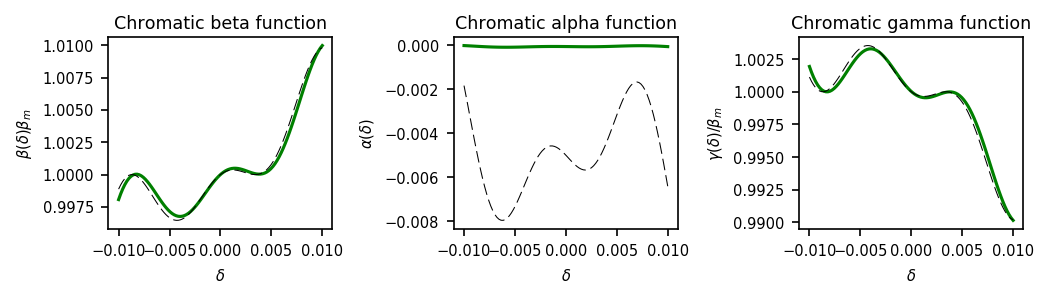

In [11]:
# The offset is due to the adiabatic approximation, more adiabatic and it goes away
# You can see this by noting that delta=0 is not at exactly 1 as the adiabatic approximation would predict
ind = 90000
psi = (1-delta/2)*theta[ind]
betaDeltaA = betam[ind]*(delta/2*(1-np.cos(2*psi))+1)
alphaDeltaA = am[ind]*betaDeltaA/betam[ind]-delta/2*np.sin(2*psi)
gammaDeltaA = 1/betam[ind]*(-delta/2*(1-np.cos(2*psi))+1)

plt.figure(figsize=(7, 2), dpi=150)
gs = gridspec.GridSpec(1, 3)

plt.subplot(gs[0, 0])
plt.plot(delta, betaDelta[:, ind]/betam[ind], 'g')
plt.plot(delta, betaDeltaA/betam[ind], 'k--', linewidth=0.5)
plt.title(r'Chromatic beta function')
plt.xlabel(r'$\delta$')
plt.ylabel(r'$\beta(\delta)\beta_m$')

plt.subplot(gs[0, 1])
plt.plot(delta, alphaDelta[:, ind]/betam[ind], 'g')
plt.plot(delta, alphaDeltaA, 'k--', linewidth=0.5)
plt.title(r'Chromatic alpha function')
plt.xlabel(r'$\delta$')
plt.ylabel(r'$\alpha(\delta)$')

plt.subplot(gs[0, 2])
plt.plot(delta, gammaDelta[:, ind]*betam[ind], 'g')
plt.plot(delta, gammaDeltaA*betam[ind], 'k--', linewidth=0.5)
plt.title(r'Chromatic gamma function')
plt.xlabel(r'$\delta$')
plt.ylabel(r'$\gamma(\delta)/\beta_m$')
plt.tight_layout()
plt.show()

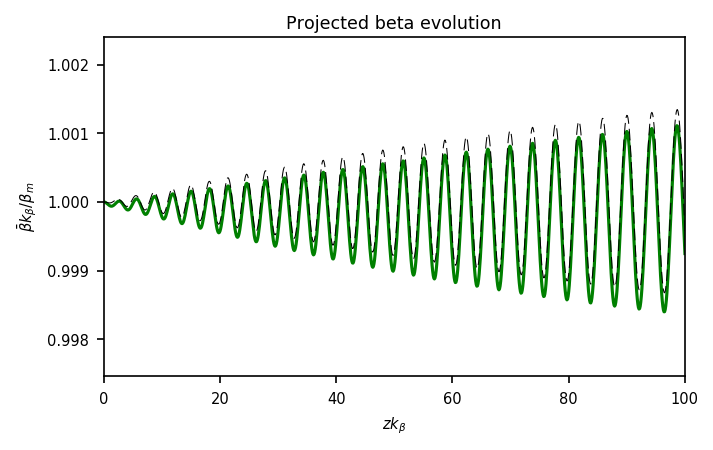

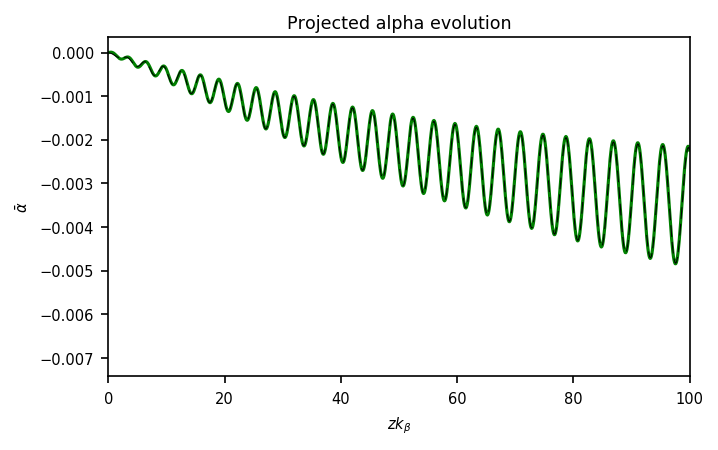

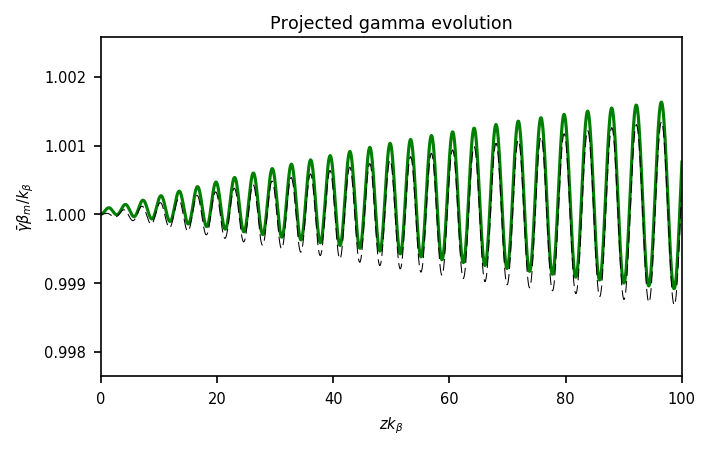

In [12]:
theta[0]=0.00000001
xi = np.cos(sigmaD*theta) - np.sin(sigmaD*theta)/(sigmaD*theta)
betaPa = xi*np.sin(2*theta)/(2*theta)+1

plt.figure(figsize=(5, 3), dpi=150)
plt.plot(z, betaP/betam, 'g')
plt.plot(z, betaPa, 'k--', linewidth=0.5)
plt.title(r'Projected beta evolution')
plt.xlabel(r'$z k_\beta$')
plt.ylabel(r'$\bar{\beta} k_\beta/\beta_m$')
plt.xlim(0, 100)
plt.show()

alphaPa = am*(xi*np.sin(2*theta)/(2*theta)+1)-xi*np.cos(2*theta)/(2*theta)

plt.figure(figsize=(5, 3), dpi=150)
plt.plot(z, alphaP, 'g')
plt.plot(z, alphaPa, 'k--', linewidth=0.5)
plt.title(r'Projected alpha evolution')
plt.xlabel(r'$z k_\beta$')
plt.ylabel(r'$\bar{\alpha}$')
plt.xlim(0, 100)
plt.show()

gammaPa = -xi*np.sin(2*theta)/(2*theta)+1 + 2*am*alphaPa

plt.figure(figsize=(5, 3), dpi=150)
plt.plot(z, gammaP*betam, 'g')
plt.plot(z, gammaPa, 'k--', linewidth=0.5)
plt.title(r'Projected gamma evolution')
plt.xlabel(r'$z k_\beta$')
plt.ylabel(r'$\bar{\gamma} \beta_m/k_\beta$')
plt.xlim(0, 100)
plt.show()

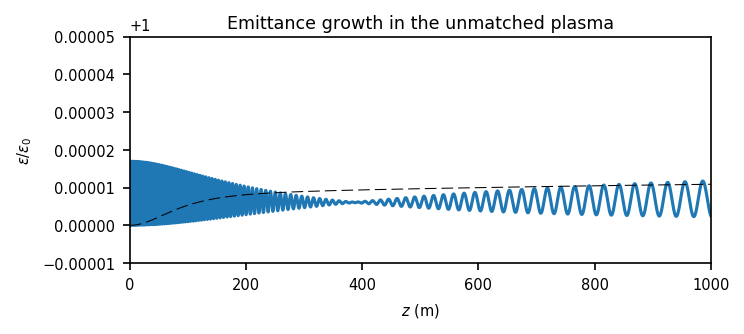

In [13]:
eps = np.sqrt(betaP*gammaP-alphaP**2)
epsa = np.sqrt(betaPa*gammaPa-alphaPa**2)
epsa = np.sqrt(1-(xi/2/theta)**2+am**2)
plt.figure(figsize=(5, 2), dpi=150)
plt.plot(z, eps)
plt.plot(z, epsa, 'k--', linewidth=0.5)
plt.plot([0.0, 3.5], [1.434, 1.434], 'k--')
plt.title(r'Emittance growth in the unmatched plasma')
plt.xlabel(r'$z$ (m)')
plt.ylabel(r'$\epsilon/\epsilon_0$')
plt.xlim(0, 1000)
plt.ylim(0.99999, 1.00005)
plt.show()

In [14]:
# Need to find average emittance as a function of am and position
def get_avg_em(alpham, delta):
    a = alpham*2
    M = 100
    N = 10000
    z = np.linspace(0, 1000, N)
    frac = 1/(1+(a*z)**2)
    gb0 = 20000
    ne0 = 2*gb0/5.95074e4**2
    ne = frac*ne0
    deltaA = np.linspace(-delta, delta, M)
    gb0A = 20000*(1+deltaA)
    betaDelta = np.zeros((M, N), dtype='double')
    alphaDelta = np.zeros((M, N), dtype='double')
    gammaDelta = np.zeros((M, N), dtype='double')
    for i in range(M):
        betaDelta[i,:], alphaDelta[i, :], gammaDelta[i, :], gb = ecalc.cs_propagation(z,ne, beta0, alpha0, gb0A[i],
                                                                                  dgdz0, ne0)
    betaP = np.average(betaDelta, axis=0)
    alphaP = np.average(alphaDelta, axis=0)
    gammaP = np.average(gammaDelta, axis=0)
    eps = np.sqrt(betaP*gammaP-alphaP**2)
    average = np.average(eps)
    return average

In [15]:
# Fix am and find the average emittance as a function of delta, compare to theory
N = 100
am = 0.1
delta = np.linspace(0.0, 0.01, N)
em = np.zeros(N)
for i in range(N):
    em[i] = get_avg_em(am, delta[i])

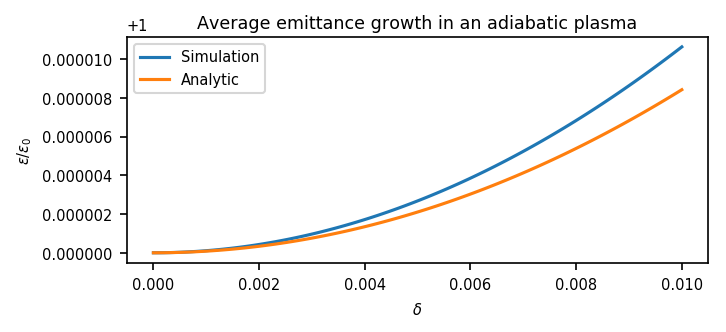

In [16]:
plt.figure(figsize=(5, 2), dpi=150)
plt.plot(delta, em)
plt.plot(delta, 2*delta**2*(1+am**2)/24+1)
plt.title("Average emittance growth in an adiabatic plasma")
plt.xlabel(r'$\delta$')
plt.ylabel(r'$\epsilon/\epsilon_0$')
plt.legend(['Simulation', 'Analytic'])
plt.show()

In [17]:
# Fix delta and find the average emittance as a function of am, compare to theory
N = 100
delta = 0.01
am = np.linspace(0.0, 0.1, N)
em = np.zeros(N)
for i in range(N):
    em[i] = get_avg_em(am[i], delta)

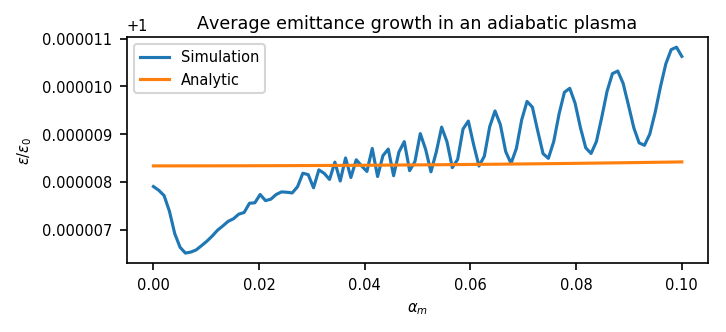

In [18]:
plt.figure(figsize=(5, 2), dpi=150)
plt.plot(am, em)
plt.plot(am, 2*delta**2*(1+am**2)/24+1)
plt.title("Average emittance growth in an adiabatic plasma")
plt.xlabel(r'$\alpha_m$')
plt.ylabel(r'$\epsilon/\epsilon_0$')
plt.legend(['Simulation', 'Analytic'])
plt.show()


In [19]:
# Need to find average emittance as a function of am and position
# The incoming beta function now is linear in delta
def get_avg_em_chrom(alpham, delta, db):
    a = alpham*2
    M = 100
    N = 10000
    z = np.linspace(0, 1000, N)
    beta0 = 1-np.linspace(-db*delta, db*delta, N)
    frac = 1/(1+(a*z)**2)
    gb0 = 20000
    ne0 = 2*gb0/5.95074e4**2
    ne = frac*ne0
    deltaA = np.linspace(-delta, delta, M)
    gb0A = 20000*(1+deltaA)
    betaDelta = np.zeros((M, N), dtype='double')
    alphaDelta = np.zeros((M, N), dtype='double')
    gammaDelta = np.zeros((M, N), dtype='double')
    for i in range(M):
        betaDelta[i,:], alphaDelta[i, :], gammaDelta[i, :], gb = ecalc.cs_propagation(z,ne, beta0[i], alpha0, gb0A[i],
                                                                                  dgdz0, ne0)
    betaP = np.average(betaDelta, axis=0)
    alphaP = np.average(alphaDelta, axis=0)
    gammaP = np.average(gammaDelta, axis=0)
    eps = np.sqrt(betaP*gammaP-alphaP**2)
    average = np.average(eps)
    return average

In [20]:
N = 100
am = 0.1
delta = 0.01
db = np.linspace(0.0, 0.2, N)
em = np.zeros(N)
for i in range(N):
    em[i] = get_avg_em_chrom(am, delta, db[i])

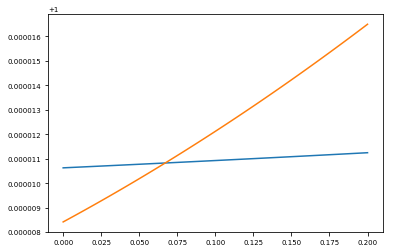

In [21]:
# So this didn't work at all...
plt.plot(db, em)
plt.plot(db, (1+2*db)**2*delta**2*(1+am**2)/12+1)
plt.show()